In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [272]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_5176/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data_available:False, technique:pre_defined_q...",['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[evaluation:auto_grading, approach:semi_automa...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data_available:False, tool:pylint, language:p...",['static'],"['readability', 'maintainability']",['description'],['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']


# Discussion Stats
## Grading
### Correctness

In [273]:
temp_df = df[df.skills.str.contains("^\['correctness'\]$")].copy()
temp_df['tech'] = df.tags.apply(lambda labels: [label for label in labels if label.startswith('technique')])
temp_df[['key', 'title', 'category', 'tech']]

,key,title,category,tech
0,rayyan-354359269,An experience of automated assessment in a lar...,['dynamic'],"[technique:pre_defined_questions, technique:un..."
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"['dynamic', 'static']","[technique:output_matching, technique:unit_tes..."
5,rayyan-354359274,Evaluating Control-Flow Graph Similarity for G...,['static'],"[technique:model_solution_req, technique:patte..."
7,rayyan-354359277,An interactive feedback system for grammar dev...,['dynamic'],"[technique:unit_testing, technique:trace_exami..."
8,rayyan-354359278,Combining dynamic and static analysis for auto...,"['dynamic', 'static']","[technique:unit_testing, technique:model_solut..."
...,...,...,...,...
115,rayyan-354359408,ArTEMiS - An automatic assessment management s...,['dynamic'],"[technique:unit_testing, technique:ci_cd]"
116,rayyan-354359409,Linkage objects for generalized instruction in...,"['static', 'machine learning']","[technique:machine_learning, technique:pattern..."
117,rayyan-354359410,Automated data-driven hints for computer progr...,['dynamic'],[technique:unit_testing]
118,rayyan-354359411,Learning and teaching numerical methods with a...,"['dynamic', 'static']","[technique:unit_testing, technique:matching_ru..."


In [274]:
(temp_df.shape[0] / df.shape[0]) * 100

60.65573770491803

In [275]:
temp_df.category.value_counts()

['dynamic']                        39
['static']                         16
['dynamic', 'static']              13
['static', 'machine learning']      3
['machine learning']                2
['dynamic', 'machine learning']     1
Name: category, dtype: int64

In [276]:
(temp_df.category.value_counts() / temp_df.shape[0]) * 100

['dynamic']                        52.702703
['static']                         21.621622
['dynamic', 'static']              17.567568
['static', 'machine learning']      4.054054
['machine learning']                2.702703
['dynamic', 'machine learning']     1.351351
Name: category, dtype: float64

In [277]:
temp_df['only_dynamic'] = df.category.apply(lambda x: 'dynamic' in str(x) and 'static' not in str(x) and 'machine learning' not in str(x))
(temp_df[temp_df.only_dynamic].explode('tech').tech.value_counts() / temp_df[temp_df.only_dynamic].shape[0]) * 100

technique:unit_testing                100.000000
technique:ci_cd                        12.820513
technique:model_solution_req           10.256410
technique:trace_examination             5.128205
technique:property_based_testing        5.128205
technique:pre_defined_questions         2.564103
technique:unit_test_expansion           2.564103
technique:mutation_testing              2.564103
technique:test_case_generation          2.564103
technique:novel                         2.564103
technique:gui_testing                   2.564103
technique:output_matching               2.564103
technique:program_synthesis             2.564103
technique:code_repair_for_feedback      2.564103
technique:knowledge_base                2.564103
Name: tech, dtype: float64

In [278]:
temp_df['only_static'] = df.category.apply(lambda x: 'dynamic' not in str(x) and 'static' in str(x) and 'machine learning' not in str(x))
(temp_df[temp_df.only_static].explode('tech').tech.value_counts() / temp_df[temp_df.only_static].shape[0]) * 100

technique:pattern_matching            75.00
technique:model_solution_req          43.75
technique:model_solution_closeness    37.50
technique:program_repair              37.50
technique:code_repair_for_feedback    31.25
technique:clustering                  18.75
technique:trace_examination           18.75
technique:output_matching             12.50
technique:matching_rules              12.50
technique:graph_analysis              12.50
technique:control_flow_graph           6.25
technique:data_driven                  6.25
technique:token_pattern_matching       6.25
technique:knowledge_base               6.25
technique:dynamic_analysis             6.25
Name: tech, dtype: float64

In [279]:
temp_df['dynamic_static'] = df.category.apply(lambda x: 'dynamic' in str(x) and 'static' in str(x) and 'machine learning' not in str(x))
(temp_df[temp_df.dynamic_static].explode('tech').tech.value_counts() / temp_df[temp_df.dynamic_static].shape[0]) * 100

technique:unit_testing                100.000000
technique:pattern_matching             30.769231
technique:matching_rules               30.769231
technique:static_analysis              23.076923
technique:program_repair               23.076923
technique:output_matching              15.384615
technique:model_solution_req           15.384615
technique:dynamic_analysis             15.384615
technique:model_solution_closeness     15.384615
technique:style_check                  15.384615
technique:fault_localisation            7.692308
technique:program_verification          7.692308
technique:language_stuctures            7.692308
technique:ci_cd                         7.692308
technique:test_case_generation          7.692308
Name: tech, dtype: float64

In [280]:
temp_df['ml'] = df.category.apply(lambda x: 'machine learning' in str(x))
ml_df = temp_df.loc[temp_df.ml]
ml_df[['key', 'title', 'category']]

,key,title,category
13,rayyan-354359285,An Intelligent Online Judge System for Program...,"['dynamic', 'machine learning']"
19,rayyan-354359295,Convolutional neural network applied to code a...,['machine learning']
34,rayyan-354359310,Automatic assessment of programming assignment...,['machine learning']
61,rayyan-354359341,Source-Code Similarity Measurement: Syntax Tre...,"['static', 'machine learning']"
83,rayyan-354359367,Targeted Example Generation for Compilation Er...,"['static', 'machine learning']"
116,rayyan-354359409,Linkage objects for generalized instruction in...,"['static', 'machine learning']"


### Maintainability

In [372]:
maint_df = df[df.skills.str.contains("^\['maintainability'\]$")].copy()
maint_df

,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
92,rayyan-354359378,A Comparison of Inquiry-Based Conceptual Feedb...,"Cordova L., Carver J., Gershmel N., Walia G.",The feedback provided by current testing educa...,2021,"[interaction:multiple, evaluation:student_surv...",NaN,['maintainability'],['evaluation'],['OOP']


In [370]:
maint_df['tech'] = maint_df.tags.apply(lambda labels: [label for label in labels if label.startswith('technique')])
(maint_df.explode('tech').tech.value_counts() / maint_df.shape[0]) * 100

technique:unclear    100.0
Name: tech, dtype: float64

#### Maintainability Combinations

In [352]:
maint_comb = df[df.skills.str.contains("'maintainability',|, 'maintainability'")]

In [359]:
(maint_comb.skills.value_counts() / maint_comb.shape[0]) * 100

['correctness', 'maintainability']                   42.105263
['correctness', 'readability', 'maintainability']    36.842105
['readability', 'maintainability']                   21.052632
Name: skills, dtype: float64

In [360]:
(maint_comb.category.value_counts() / maint_comb.shape[0]) * 100

['static']                        31.578947
['dynamic']                       31.578947
['dynamic', 'static']             26.315789
['static', 'machine learning']    10.526316
Name: category, dtype: float64

In [376]:
maint_comb = maint_comb.fillna('empty')
maint_comb[maint_comb.category.str.contains('machine learning')]

,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
50,rayyan-354359328,Question Independent Automated Code Analysis a...,K. K. Rai and B. Gupta and P. Shokeen and P. C...,Our first-hand experience with the recruiting ...,2019,"[evaluation:auto_grading, feedback:none, type:...","['static', 'machine learning']","['correctness', 'readability', 'maintainability']","['description', 'evaluation']",['OOP']
120,rayyan-354359413,An AI system for coaching novice programmers,"Cruz G., Jones J., Morrow M., Gonzalez A., Goo...",We inhabit a century where every job will be t...,2017,"[approach:fully_automated, type:description, t...","['static', 'machine learning']","['readability', 'maintainability']","['description', 'evaluation']",['OOP']


### Readability

In [342]:
# Analysing hint based problem solving strategy among novice programmers through gamification technique - Might be removed
read_df = df[df.skills.str.contains("^\['readability'\]$")]
read_df[['key', 'title', 'category']]

,key,title,category
12,rayyan-354359284,Using an interactive software tool for the for...,"['dynamic', 'static']"
30,rayyan-354359306,The impact of automated code quality feedback ...,['static']
77,rayyan-354359360,Promoting Code Quality via Automated Feedback ...,['static']
79,rayyan-354359362,Measure Students’ Contribution in Web Programm...,['static']
103,rayyan-354359393,Analysing hint based problem solving strategy ...,['static']
108,rayyan-354359398,Static analyses in python programming courses,['static']


In [339]:
(read_df.shape[0] / df.shape[0]) * 100

4.918032786885246

In [366]:
read_df.category.value_counts()

['static']               5
['dynamic', 'static']    1
Name: category, dtype: int64

In [356]:
read_comb = df[df.skills.str.contains("'readability',|, 'readability'")]

In [363]:
(read_comb.skills.value_counts() / read_comb.shape[0]) * 100

['correctness', 'readability']                       65.625
['correctness', 'readability', 'maintainability']    21.875
['readability', 'maintainability']                   12.500
Name: skills, dtype: float64

In [367]:
(read_comb.category.value_counts() / read_comb.shape[0]) * 100

['dynamic', 'static']                        40.625
['dynamic']                                  28.125
['static']                                   18.750
['static', 'machine learning']                6.250
['dynamic', 'static', 'machine learning']     3.125
['machine learning']                          3.125
Name: category, dtype: float64

In [379]:
read_comb[read_comb.category.str.contains('machine learning')]

,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
50,rayyan-354359328,Question Independent Automated Code Analysis a...,K. K. Rai and B. Gupta and P. Shokeen and P. C...,Our first-hand experience with the recruiting ...,2019,"[evaluation:auto_grading, feedback:none, type:...","['static', 'machine learning']","['correctness', 'readability', 'maintainability']","['description', 'evaluation']",['OOP']
51,rayyan-354359330,EvalSeer: An Intelligent Gamified System for P...,R. Nabil and N. E. Mohamed and A. Mahdy and K....,Continuous evaluation of computer programs and...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static', 'machine learning']","['correctness', 'readability']",['description'],['OOP']
85,rayyan-354359369,Annete: An Intelligent Tutoring Companion Embe...,M. Day and M. R. Penumala and J. Gonzalez-Sanchez,With Computer Science (CS) class sizes that ar...,2019,"[data_available:False, skill:correctness, inte...",['machine learning'],"['correctness', 'readability']","['description', 'evaluation']",['OOP']
120,rayyan-354359413,An AI system for coaching novice programmers,"Cruz G., Jones J., Morrow M., Gonzalez A., Goo...",We inhabit a century where every job will be t...,2017,"[approach:fully_automated, type:description, t...","['static', 'machine learning']","['readability', 'maintainability']","['description', 'evaluation']",['OOP']


### Correctness, Documentation

In [387]:
df[df.skills.str.contains("^\['correctness', 'documentation'\]$")]

,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
29,rayyan-354359305,Developing applications to automatically grade...,Gerdes J.,There are many unique challenges associated wi...,2017,"[data_available:False, skill:correctness, tech...",['static'],"['correctness', 'documentation']","['description', 'evaluation']",['OOP']


## Degree of Automation

In [403]:
doa_df = df.copy()
doa_df.tags = doa_df.tags.apply(lambda labels: [str(label) for label in labels if label.startswith('approach')])
doa_df = doa_df.explode('tags')
doa_df.tags.value_counts()

approach:fully_automated    100
approach:semi_automatic      17
approach:unclear              5
Name: tags, dtype: int64

In [404]:
(doa_df.tags.value_counts() /  doa_df.shape[0]) * 100

approach:fully_automated    81.967213
approach:semi_automatic     13.934426
approach:unclear             4.098361
Name: tags, dtype: float64

In [406]:
doa_df[doa_df.tags.str.contains('semi')]

,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,approach:semi_automatic,"['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,approach:semi_automatic,"['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
10,rayyan-354359280,Syntactic and Semantic Analysis for Extended F...,"Andujar C., Vijulie C.R., Vinacua A., Santos B...",Modern computer graphics courses require stude...,2020,approach:semi_automatic,"['dynamic', 'static']","['correctness', 'readability']",['description'],['Graphics']
14,rayyan-354359287,Teaching programming at scale,"Kaplan A., Keim J., Schneider Y.R., Walter M.,...",Teaching programming is a difficult task and t...,2020,approach:semi_automatic,"['dynamic', 'static']","['correctness', 'readability']",['experience'],['OOP']
16,rayyan-354359291,A parser-based tool to assist instructors in g...,"Andujar C., Vijulie C.R., Vinacua A.",Although online e-learning environments are in...,2019,approach:semi_automatic,"['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']","['OOP', 'Graphics']"
19,rayyan-354359295,Convolutional neural network applied to code a...,"De Souza F.R., De Assis Zampirolli F., Kobayas...",Thousands of students have their assignments e...,2019,approach:semi_automatic,['machine learning'],['correctness'],"['description', 'evaluation']",['OOP']
36,rayyan-354359313,Enhancing the Learning of Database Access Prog...,B. Pérez,Database access programming is a noteworthy co...,2021,approach:semi_automatic,['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
37,rayyan-354359314,MAESTRO: a semi-autoMAted Evaluation SysTem fo...,A. Bertagnon and M. Gavanelli,Many works in the literature highlight the imp...,2020,approach:semi_automatic,['dynamic'],['correctness'],"['description', 'evaluation']","['OOP', 'Functional']"
41,rayyan-354359318,Gradeer: An Open-Source Modular Hybrid Grader,B. Clegg and M. -C. Villa-Uriol and P. McMinn ...,Automated assessment has been shown to greatly...,2021,approach:semi_automatic,"['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']
44,rayyan-354359321,Automating Testing of Visual Observed Concurrency,P. Dewan and A. Wortas and Z. Liu and S. Georg...,Existing techniques for automating the testing...,2021,approach:semi_automatic,['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']


## Novelty of Research

In [282]:
novel_df = df[['year_published','category', 'skills']].copy()
novel_df.head()

,year_published,category,skills
0,2021,['dynamic'],['correctness']
1,2021,"['dynamic', 'static']","['correctness', 'maintainability']"
2,2021,['static'],"['readability', 'maintainability']"
3,2021,"['dynamic', 'static']",['correctness']
4,2021,"['dynamic', 'static']","['correctness', 'readability']"


In [283]:
# Probably have to rethink how I have done this...
def assign_skill_cat_combo(categories, skills):
    combos = []
    if 'correctness' in skills and 'dynamic' in categories:
        combos.append('correctness_dynamic')
    if 'correctness' in skills and 'static' in categories:
        combos.append('correctness_static')
    if 'correctness' in skills and 'machine learning' in categories:
        combos.append('correctness_ml')
    if 'maintainability' in skills and 'dynamic' in categories:
        combos.append('maintainability_dynamic')
    if 'maintainability' in skills and 'static' in categories:
        combos.append('maintainability_static')
    if 'maintainability' in skills and 'machine learning' in categories:
        combos.append('maintainability_ml')
    if 'readability' in skills and 'dynamic' in categories:
        combos.append('readability_dynamic')
    if 'readability' in skills and 'static' in categories:
        combos.append('readability_static')
    if 'readability' in skills and 'machine learning' in categories:
        combos.append('readability_ml')
    if 'documentation' in skills and 'dynamic' in categories:
        combos.append('documentation_dynamic')
    if 'documentation' in skills and 'static' in categories:
        combos.append('documentation_static')
    if 'documentation' in skills and 'machine learning' in categories:
        combos.append('documentation_ml')
    return combos

In [284]:
novel_df = novel_df.fillna('empty')
novel_df['combo'] = novel_df.apply(lambda x: assign_skill_cat_combo(x.category, x.skills), axis=1).explode('combo')

novel_df

,year_published,category,skills,combo
0,2021,['dynamic'],['correctness'],correctness_dynamic
1,2021,"['dynamic', 'static']","['correctness', 'maintainability']",correctness_dynamic
2,2021,['static'],"['readability', 'maintainability']",correctness_static
3,2021,"['dynamic', 'static']",['correctness'],maintainability_dynamic
4,2021,"['dynamic', 'static']","['correctness', 'readability']",maintainability_static
...,...,...,...,...
117,2017,['dynamic'],['correctness'],readability_dynamic
118,2017,"['dynamic', 'static']",['correctness'],correctness_dynamic
119,2017,['dynamic'],"['correctness', 'maintainability']",correctness_dynamic
120,2017,"['static', 'machine learning']","['readability', 'maintainability']",correctness_static


In [285]:
df.shape

(122, 10)

In [286]:
novel_df_grp = novel_df.drop(columns=['category', 'skills'])
novel_df_grp = novel_df_grp.groupby('year_published').value_counts().reset_index()
novel_df_grp.columns = ['year_published', 'combo', 'number']
novel_df_grp['proportion'] = (novel_df_grp.number / novel_df.shape[0]) * 100
novel_df_grp

,year_published,combo,number,proportion
0,2017,correctness_static,6,4.918033
1,2017,readability_dynamic,5,4.098361
2,2017,correctness_dynamic,5,4.098361
3,2017,readability_static,2,1.639344
4,2017,correctness_ml,1,0.819672
5,2017,maintainability_static,1,0.819672
6,2018,correctness_dynamic,10,8.196721
7,2018,correctness_static,6,4.918033
8,2018,readability_static,3,2.459016
9,2018,readability_dynamic,2,1.639344


<AxesSubplot: xlabel='year_published', ylabel='number'>

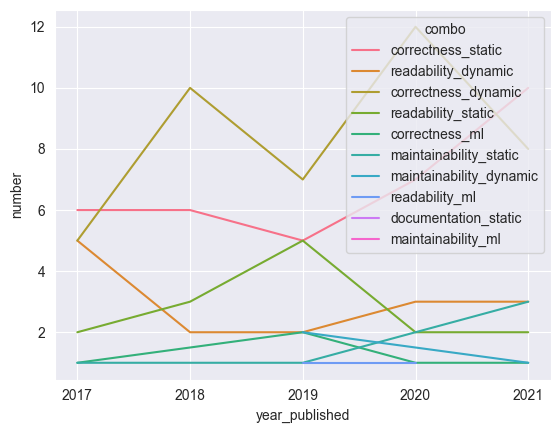

In [287]:
novel_df_grp.year_published = novel_df_grp.year_published.astype('str')
sns.lineplot(novel_df_grp, x='year_published', y='number', hue='combo')

<AxesSubplot: xlabel='year_published', ylabel='combo'>

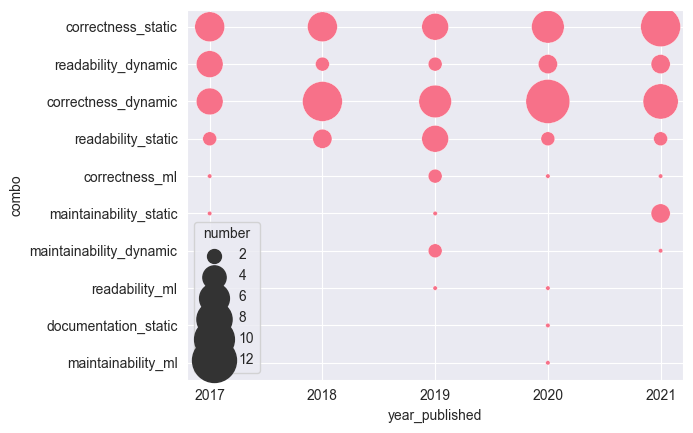

In [288]:
sns.scatterplot(novel_df_grp, x='year_published', y='combo', size='number', sizes=(10, 1000))